In [4]:
# All imports and setups 

%run ../../../common_functions/import_all.py

import sys
sys.path.append('../../')

import statsmodels.api as sm
from scipy.spatial.distance import euclidean

from common_functions.setup_notebook import *

config_ipython()
setup_matplotlib()
set_css_style()

# The Gradient Descent method

## Standard Gradient Descent: finding the minumum of a function

### Minimizing a 1D parabola with Standard Gradient Descent

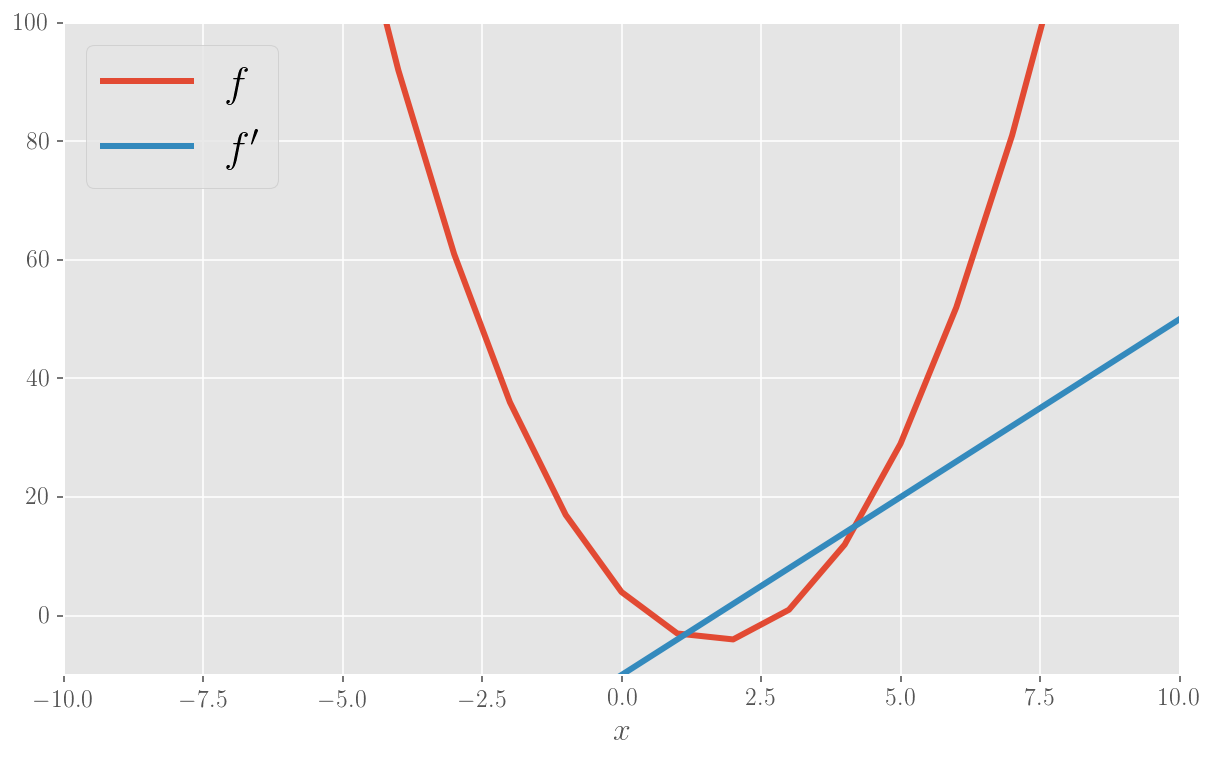

Local min of function is 1.666702


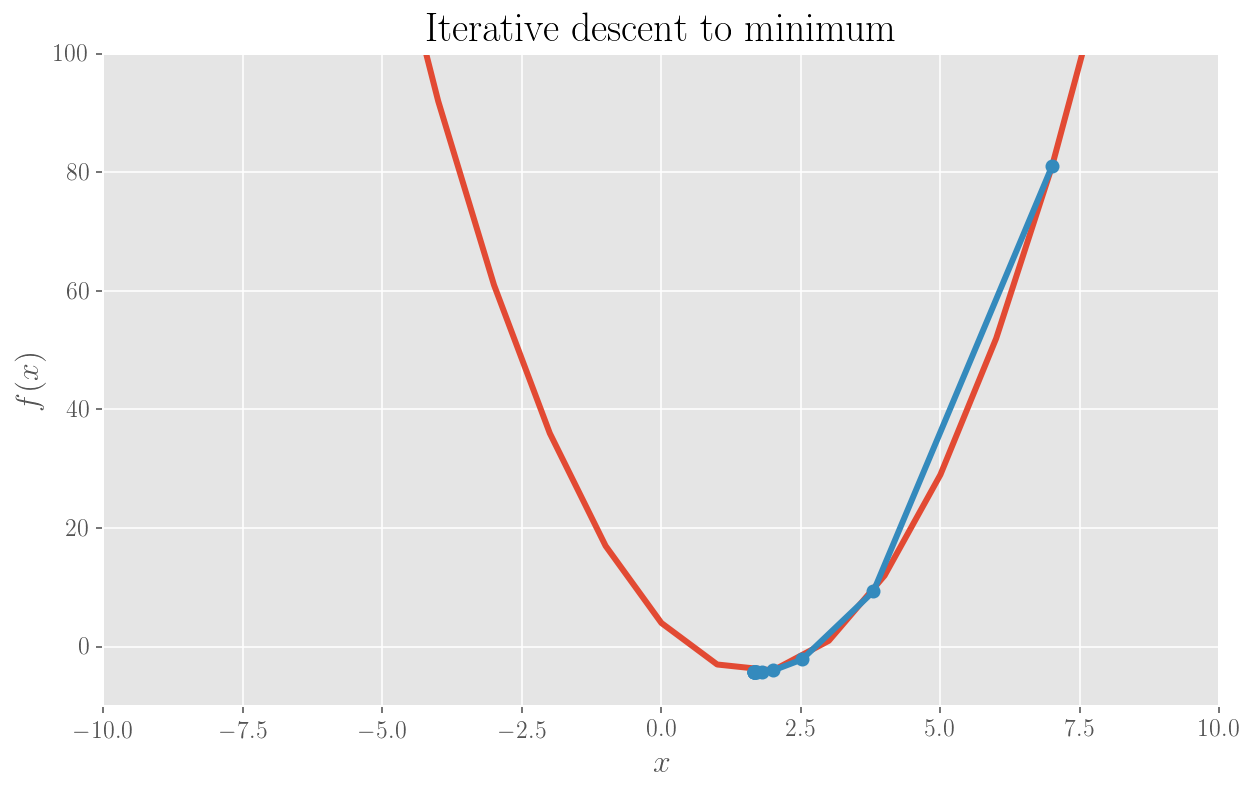

In [5]:
# Choose the x points
x = np.array([i for i in range(-1000, 1000)])

# Define the function and its derivative
def f1(x):
    return 3*x**2 - 10*x + 4

def f1_der(x):
    return 6*x - 10

# Plot the function
plt.ylim(-10,100)
plt.xlim(-10,10)
plt.plot(x, f1(x), label='$f$', lw=3)
plt.plot(x, f1_der(x), label="$f'$", lw=3)
plt.legend(loc=2)
plt.xlabel('$x$')
plt.show()

# Running the Gradient Descent

x0 = 7                                 # starting point for the descent
alpha = .1                             # step size (learning rate)
p = .0001                                # chosen precision

former_min = x0
iterative_mins = [former_min]
while True:
    x_min = former_min - alpha * f1_der(former_min)
    iterative_mins.append(x_min)
    if abs(former_min - x_min) <= p:
        break
    else:
        former_min = x_min
        
print('Local min of function is %f' %x_min)

plt.plot(x, f1(x), lw=3)
plt.ylim(-10,100)
plt.xlim(-10,10)
plt.title('Iterative descent to minimum')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(iterative_mins, f1(np.array(iterative_mins)), marker='o')
plt.show();

### Minimizing a 2D parabola with Standard Gradient Descent

The we do the same but for a paraboloid in 3 dimensions.

In [4]:
def f2(x, y):
    return x**2 + y**2

def f2_der(x, y):
    return np.array([2*x, 2*y])

#Running the Gradient Descent

x0 = 50                                # starting point for the descent
y0 = 50                                # starting point for the descent
alpha = .1                             # step size (learning rate)
p = .0001                              # chosen precision

former_min = np.array([x0, y0])
iterative_mins = [former_min]
while True:
    x_min = former_min - alpha * f2_der(former_min[0], former_min[1])
    iterative_mins.append(x_min)
    if abs(former_min[0] - x_min[0]) <= p and abs(former_min[1] - x_min[1]) <= p:
        break
    else:
        former_min = x_min
        
print('Local min of function is', x_min)

Local min of function is [ 0.00036538  0.00036538]


## Standard Gradient Descent: implementing a Linear Regression

As we said, this method is used in a Ordinary Least Squares calculation in a Linear Regression to find the line which best fits a series of observation points. Let's "manually" implement it.

### Minimizing an objective function for Linear Regression with Standard Gradient Descent

In [5]:
# The experimental points (observations)
x = np.array([1, 2, 2.5, 3, 3.5, 4.5, 4.7, 5.2, 6.1, 6.1, 6.8])
y = np.array([1.5, 1, 2, 2, 3.7, 3, 5, 4, 5.8, 5, 5.7])

alpha = 0.001                       # learning rate
p = .001                            # precision

def f(x, w):
    """A line y = wx, to be intended as w0 + w1x (x0 = 1)"""
    return np.dot(x, w)

def diff(a, b):
    return a - b

def squared_diff(a, b):
    return (a - b)**2

def obj_f(w, x, y):
    """The objective function: sum of squared diffs between observations and line predictions"""
    return sum([squared_diff(f(np.array([1, x[i]]), w), y[i]) for i in range(len(x))])

Found parameters (intercept, slope): [ 0.26961873  0.79783026]


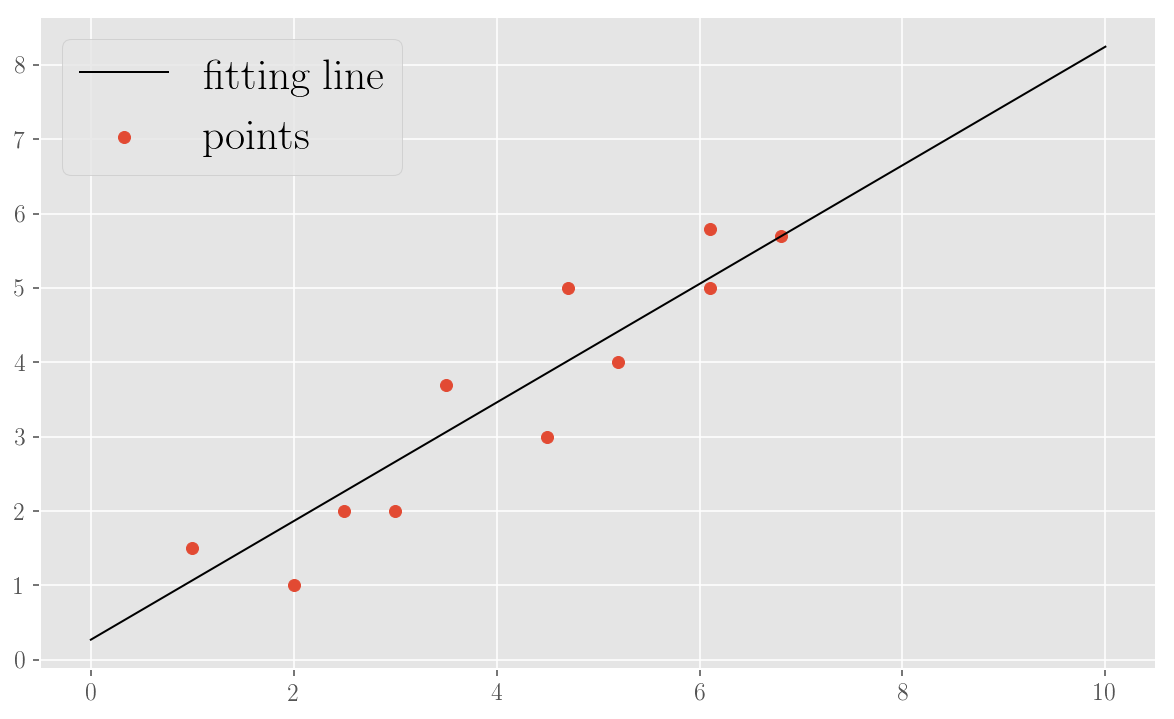

In [6]:
def obj_f_der(w, x, y):
    """Gradient of the objective function in the parameters"""
    return sum([np.dot(2 * np.array([1, x[i]]), diff(f(np.array([1, x[i]]), w), y[i])) for i in range(len(x))])

# Perform a Standard Gradient Descent to get the parameters of the fitting line
former_w = np.array([10, 5])    # the chosen starting point for the descent
while True:
    w = former_w - alpha * obj_f_der(former_w, x, y)
    if euclidean(former_w, w) <= p:
        break
    else:
        former_w = w
    
print('Found parameters (intercept, slope):', w)

plt.scatter(x, y, marker='o', label='points')
plt.plot([i for i in range(0,11)], [w[0] + w[1] * i for i in range(0, 11)], label='fitting line', c='k', lw=1)
plt.legend(loc=2)
plt.show();

## Stochastic Gradient Descent

### Minimizing an objective function for Linear Regression with Stochastic Gradient Descent

Using the same dataset, same learning rate and same precision as above, we re-implement an OLS, this time using a Stochastic Gradient Descent, and looking at the difference in the result we obtain.

2000
Found parameters (intercept, slope): [ 0.22687683  0.80406405]


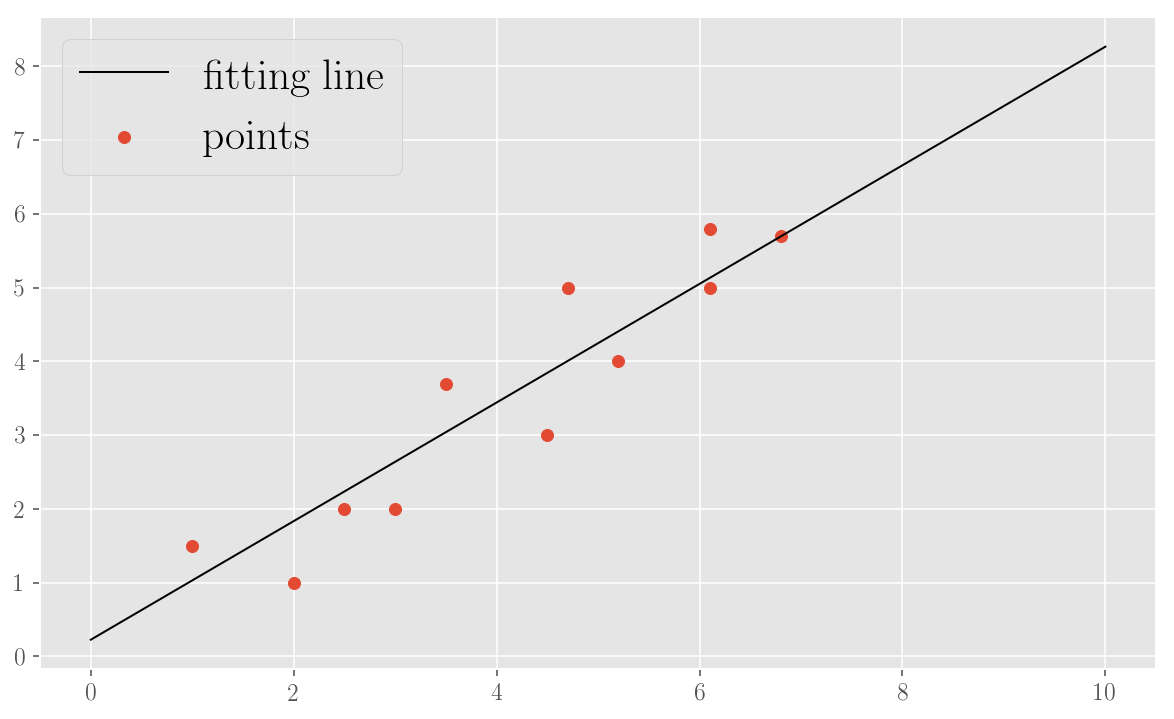

In [7]:
def obj_f_der_point(w, obs_x, obs_y):
    """Addend of the gradient of the objective function in the parameters"""
    return np.dot(2 * np.array([1, obs_x]), diff(f(np.array([1, obs_x]), w), obs_y))

# Perform a Stochastic Gradient Descent to get the parameters of the fitting line
training_set = [(x[i], y[i]) for i in range(len(x))]

epoch = 1
former_w = np.array([10, 5])            # the chosen starting point for the descent
#while epoch < 2000:

found = False
max_epochs = 2000
while epoch < max_epochs:
    random.shuffle(training_set)
    for point in training_set:
        w = former_w - alpha * obj_f_der_point(former_w, point[0], point[1])
        if euclidean(former_w, w) <= p:
            break
        else:
            former_w = w
    
    epoch +=1 
    
print(epoch)
print('Found parameters (intercept, slope):', w)

plt.scatter(x, y, marker='o', label='points')
plt.plot([i for i in range(0,11)], [w[0] + w[1] * i for i in range(0, 11)], label='fitting line', c='k', lw=1)
plt.legend(loc=2)
plt.show();